You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[ 0.04448441  0.00756676 -0.00799968 ... -0.04348059 -0.02034704
   0.0170873 ]
 [-0.11911725  0.00463041 -0.00685085 ... -0.04991785 -0.0194901
   0.01089586]
 [-0.04224764  0.00460549 -0.01150882 ... -0.06263302 -0.01293143
  -0.10245319]
 ...
 [ 0.02517801 -0.00445144 -0.00530238 ... -0.04835797  0.00683537
   0.0443619 ]
 [ 0.02679801 -0.00291932 -0.00894412 ...  0.0994144   0.01739568
   0.06522471]
 [ 0.00510697 -0.00475024  0.03138289 ...  0.0432168   0.0102289
   0.01586394]]
.values =
array([[ 0.04448441,  0.00756676, -0.00799968, ..., -0.04348059,
        -0.02034704,  0.0170873 ],
       [-0.11911725,  0.00463041, -0.00685085, ..., -0.04991785,
        -0.0194901 ,  0.01089586],
       [-0.04224764,  0.00460549, -0.01150882, ..., -0.06263302,
        -0.01293143, -0.10245319],
       ...,
       [ 0.02517801, -0.00445144, -0.00530238, ..., -0.04835797,
         0.00683537,  0.0443619 ],
       [ 0.02679801, -0.00291932, -0.00894412, ...,  0.0994144 ,
         0.01739568,  0

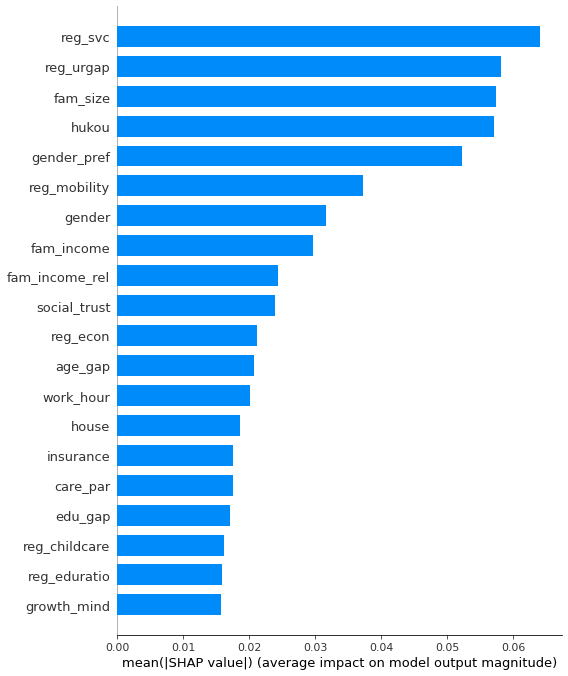

           feature  importance
0           gender    0.031627
1            urban    0.006346
2            party    0.010597
3         fam_size    0.057359
4            hukou    0.057078
5            ethno    0.005706
6        education    0.014864
7          age_gap    0.020660
8          edu_gap    0.017036
9      gender_pref    0.052340
10     mar_satisfy    0.008692
11            work    0.001960
12       work_hour    0.020094
13       insurance    0.017564
14   care_from_par    0.003195
15    fin_from_par    0.001326
16         fin_par    0.004010
17        care_par    0.017548
18        internet    0.015179
19    social_trust    0.023830
20   social_status    0.008063
21      fixed_mind    0.012135
22     growth_mind    0.015717
23        religion    0.004170
24     gover_evalu    0.008056
25   reg_eldercare    0.012652
26   reg_childcare    0.016217
27          health    0.011411
28    reg_medicare    0.012247
29           house    0.018534
30      fam_income    0.029692
31  fam_

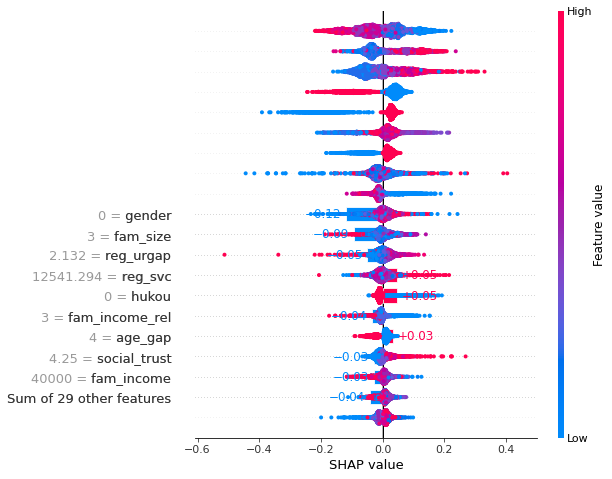

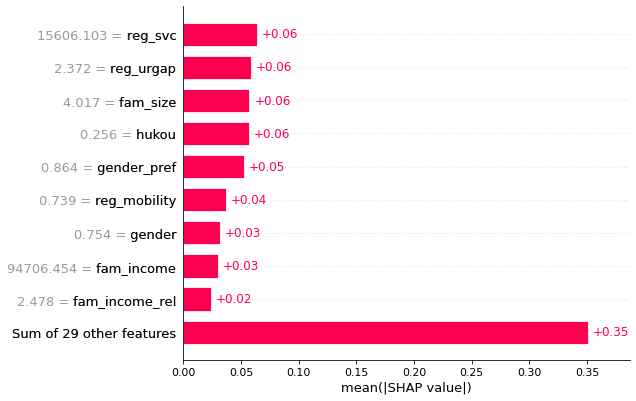

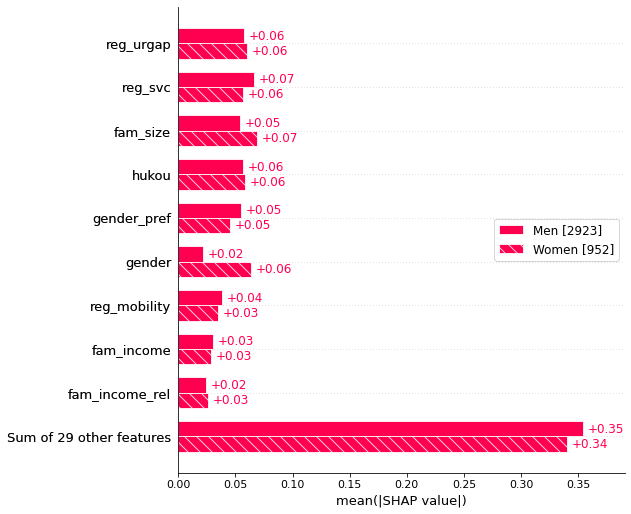

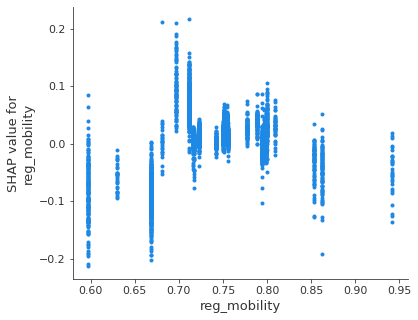

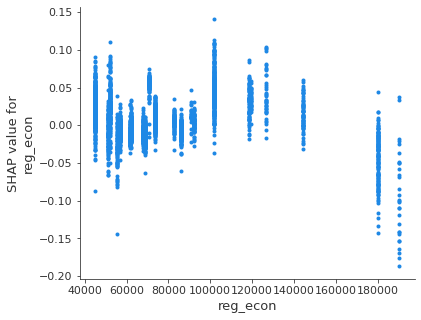

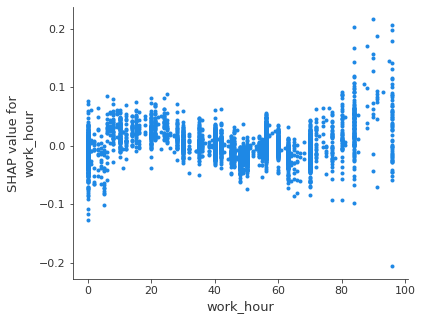

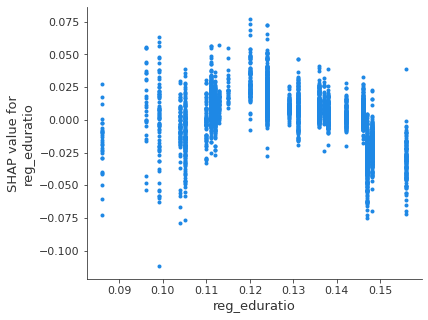

{'model_features': {'name': ['gender', 'urban', 'party', 'fam_size', 'hukou', 'ethno', 'education', 'age_gap', 'edu_gap', 'gender_pref', 'mar_satisfy', 'work', 'work_hour', 'insurance', 'care_from_par', 'fin_from_par', 'fin_par', 'care_par', 'internet', 'social_trust', 'social_status', 'fixed_mind', 'growth_mind', 'religion', 'gover_evalu', 'reg_eldercare', 'reg_childcare', 'health', 'reg_medicare', 'house', 'fam_income', 'fam_income_rel', 'area', 'reg_econ', 'reg_svc', 'reg_urgap', 'reg_eduratio', 'reg_mobility'], 'data': [0.014999999664723873, 0.009999999776482582, 0.009999999776482582, 0.020999999716877937, 0.09600000083446503, 0.03700000047683716, 0.014000000432133675, 0.017999999225139618, 0.017000000923871994, 0.05700000002980232, 0.01600000075995922, 0.010999999940395355, 0.01899999938905239, 0.023000000044703484, 0.01600000075995922, 0.017999999225139618, 0.014999999664723873, 0.02199999988079071, 0.020999999716877937, 0.01899999938905239, 0.01899999938905239, 0.018999999389052

In [6]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("0301 70s.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
#plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot",show=False)
plt.savefig('shap_70s.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
# 假设 shap_values2 是 Explanation 对象，且 "age" 是特征列
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
print(result)